In [1]:
Task 3 : Exploratory Data Analysis - Retail
Problem Statement:
           To Perform Exploratory Data Analysis on dataset SampleSuperstore.

Author : Tejal Jadhav

In [ ]:
# Importing the requied libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for charts
import seaborn as sns
%matplotlib inline
import scipy.stats as stats # for stats test

In [3]:
df = pd.read_csv(r"C:\Users\M S\Downloads/SampleSuperstore.csv",encoding="ISO-8859-1")

In [4]:
df.head () # to view the starting set

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.tail() # to view the bottom set

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
# dipects the data types and null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# checking for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
# five point summary of the data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# check for duplicates
df.duplicated().sum()

17

In [10]:
# Drop duplicated values 
df.drop_duplicates(inplace =True)

In [11]:
# NO diuplicates available. 
df.duplicated().sum()

0

In [12]:
# Number of observations.
df.shape

(9977, 13)

In [13]:
# Drop the unnecessary columns. We can drop postal code since it does not have any inmpact sales and profit. 
df.drop(columns= "Postal Code", axis=1, inplace=True)


In [14]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [15]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [16]:
corel = df.corr()
corel

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


<AxesSubplot:>

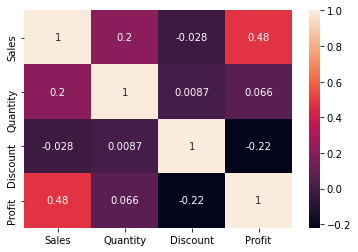

In [17]:
# Heatmap for colinearity between the Sales,profit, quantity and discount. 
sns.heatmap(corel, annot=True)

In [18]:
# State group wise view numerical data as a mean value
df_state=df.groupby(['State'])[['Quantity','Sales','Discount','Profit']].mean()
df_state

,Quantity,Sales,Discount,Profit
State,,,,
Alabama,4.196721,319.846557,0.000000,94.865989
Arizona,3.848214,157.508933,0.303571,-15.303235
Arkansas,4.000000,194.635500,0.000000,66.811452
California,3.832164,229.246629,0.072946,38.241878
Colorado,3.807692,176.418231,0.316484,-35.867351
Connecticut,3.426829,163.223866,0.007317,42.823071
Delaware,3.822917,285.948635,0.006250,103.930988
District of Columbia,4.000000,286.502000,0.000000,105.958930
Florida,3.600522,233.612815,0.299347,-8.875461


In [19]:
# State group wise view numerical data as a min value
df_state=df.groupby(['State'])[['Quantity','Sales','Discount','Profit']].min()
df_state

,Quantity,Sales,Discount,Profit
State,,,,
Alabama,1,3.620,0.0,0.0000
Arizona,1,1.408,0.2,-814.4832
Arkansas,1,4.300,0.0,1.4190
California,1,0.990,0.0,-325.5720
Colorado,1,1.080,0.2,-3399.9800
Connecticut,1,3.520,0.0,-15.5826
Delaware,1,3.380,0.0,-48.7839
District of Columbia,2,9.640,0.0,4.4344
Florida,1,1.167,0.2,-1811.0784


In [20]:
df_state=df.groupby(['State'])[['Quantity','Sales','Discount','Profit']].max()
df_state

,Quantity,Sales,Discount,Profit
State,,,,
Alabama,14,3040.000,0.0,1459.2000
Arizona,14,1879.960,0.7,211.4955
Arkansas,9,1793.980,0.0,843.1706
California,14,8187.650,0.2,1906.4850
Colorado,13,2549.985,0.7,247.9960
Connecticut,11,1133.350,0.3,294.6710
Delaware,9,10499.970,0.3,5039.9856
District of Columbia,8,1379.920,0.0,648.5624
Florida,13,22638.480,0.7,327.5922


In [21]:
# State group wise view numerical data as a median value
df_state=df.groupby(['State'])[['Quantity','Sales','Discount','Profit']].median()
df_state

,Quantity,Sales,Discount,Profit
State,,,,
Alabama,3.0,70.980,0.0,16.87500
Arizona,3.0,61.512,0.2,2.53365
Arkansas,4.0,54.420,0.0,18.34080
California,3.0,61.156,0.0,13.33380
Colorado,3.0,51.016,0.2,3.12480
Connecticut,3.0,50.000,0.0,12.18310
Delaware,3.0,67.005,0.0,19.19700
District of Columbia,3.0,35.800,0.0,14.52720
Florida,3.0,41.472,0.2,2.93400


In [22]:
sales_profit = df.groupby('State')['Profit'].sum()

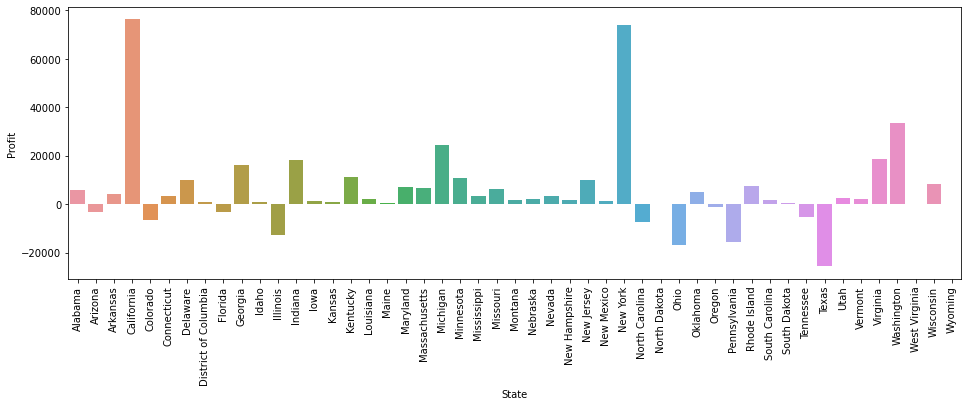

In [23]:
plt.figure(figsize=(16,5))  
sns.barplot(x=sales_profit.index, y=sales_profit.values)
plt.xticks(rotation=90)
plt.ylabel('Profit')
plt.show()

In [ ]:
sns.pairplot(df, hue='Region', diag_kind="hist")

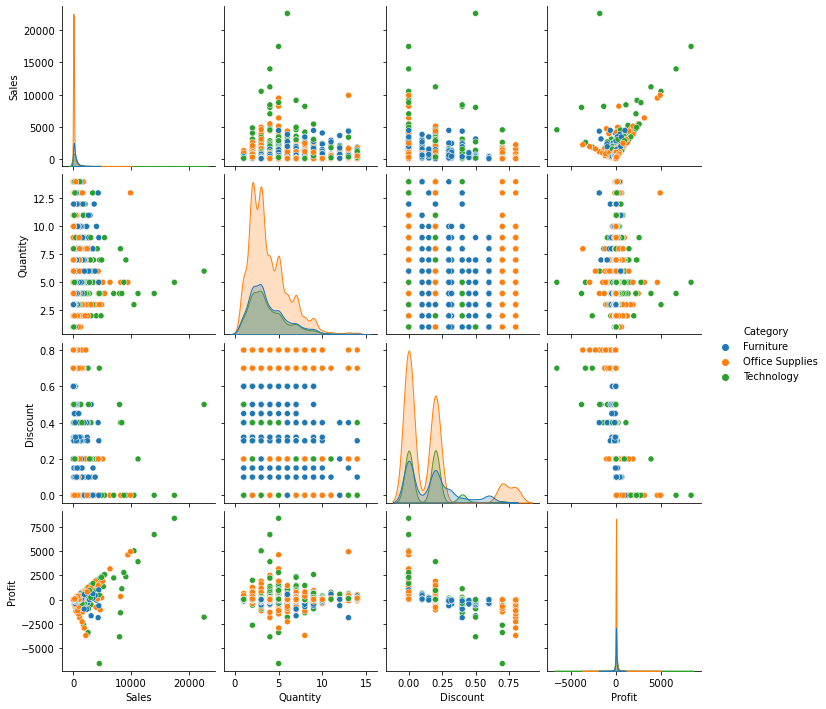

In [26]:
sns.pairplot(df,hue='Category')

In [ ]:
sns.pairplot(df,hue='Category')

In [ ]:
sns.pairplot(df,hue='Segment')

D:\Users\M S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

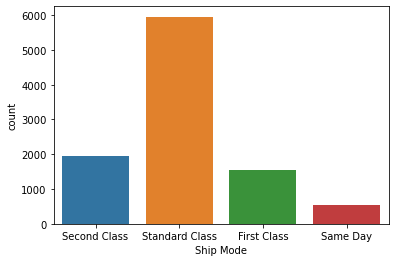

In [33]:
sns.countplot("Ship Mode",data=df)

In [ ]:
<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

D:\Users\M S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='count'>

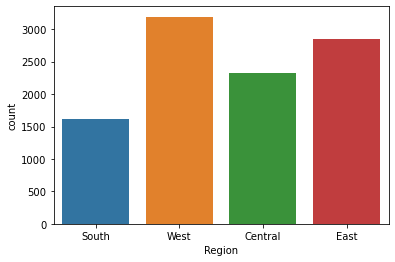

In [36]:
sns.countplot("Region",data=df)

D:\Users\M S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

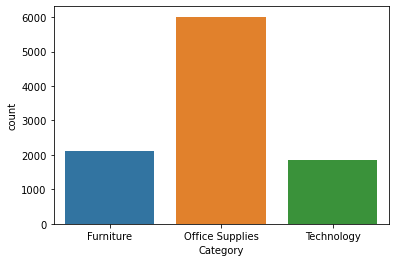

In [38]:
sns.countplot("Category",data=df)

D:\Users\M S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x1152 with 0 Axes>

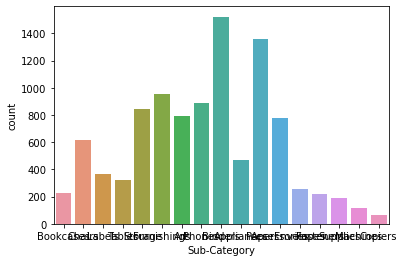

<Figure size 1080x1152 with 0 Axes>

In [40]:
sns.countplot("Sub-Category",data=df)
plt.figure(figsize=(15,16))

<AxesSubplot:xlabel='State'>

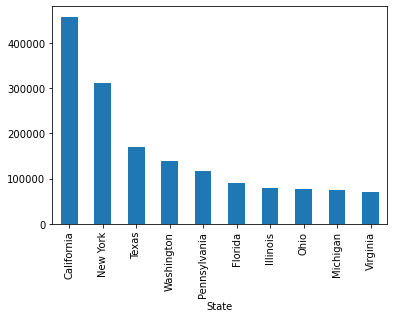

In [42]:
sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
sales[:10].plot(kind ='bar') # sales of top 10 states

<AxesSubplot:title={'center':'States with sales'}, xlabel='State'>

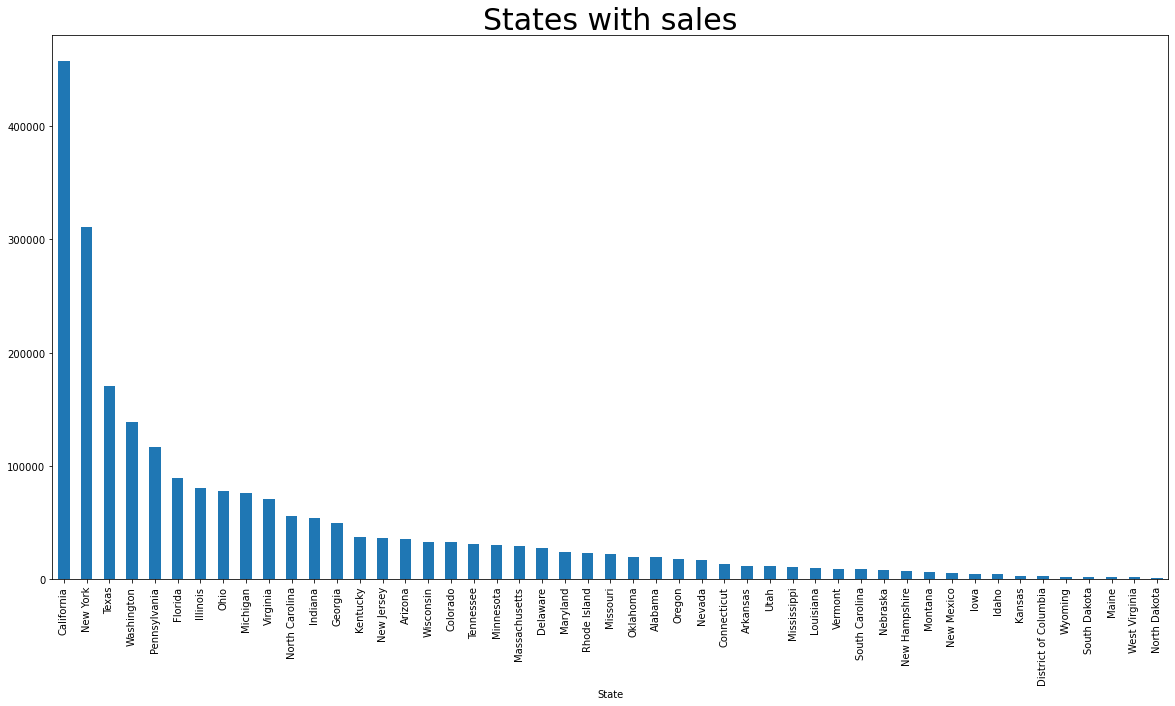

In [43]:
states = df.groupby('State')['Sales'].sum()
states.sort_values(ascending=False, inplace=True)
fig, ax=plt.subplots(figsize=(20,10))
plt.title("States with sales", size=30)
states.plot.bar()

Text(0, 0.5, 'Profit')

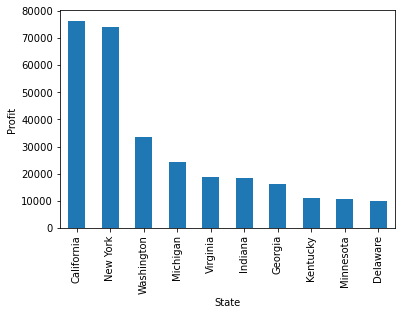

In [45]:
profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False)
profit[:10].plot(kind ='bar') # top 10 statesby profit  
plt.ylabel("Profit")

In [46]:
df.groupby("State").Profit.agg(['sum','mean','min','max','count','median','std','var'])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76330.7891,38.241878,-325.5720,1906.4850,1996,13.33380,97.803399,9565.504848
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


<ipython-input-47-49dd54dea65e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category = df.groupby(['Sub-Category'])['Profit','Sales'].sum()


<AxesSubplot:xlabel='Sub-Category'>

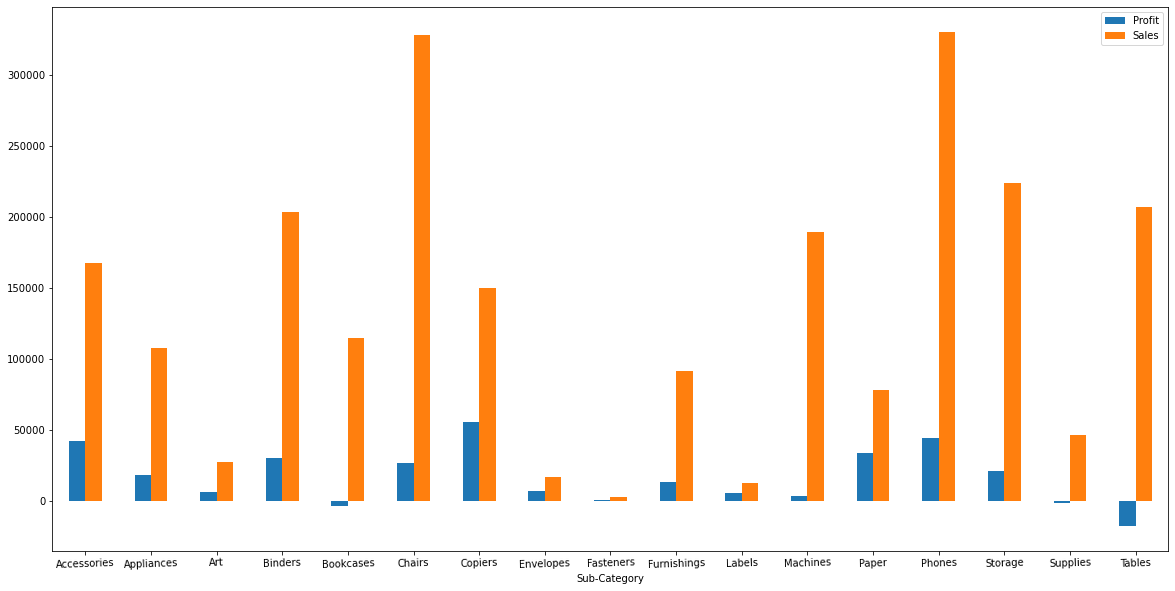

In [47]:
category = df.groupby(['Sub-Category'])['Profit','Sales'].sum()
category.plot.bar(rot=2,figsize=(20,10))

[]

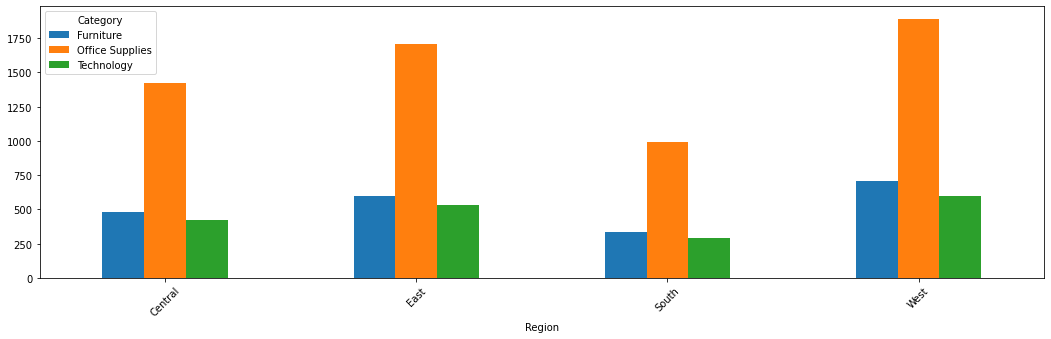

In [48]:
pd.crosstab( df['Region'],df['Category']).plot(kind='bar', figsize=(18,5))
plt.xticks(rotation=45)
plt.plot()

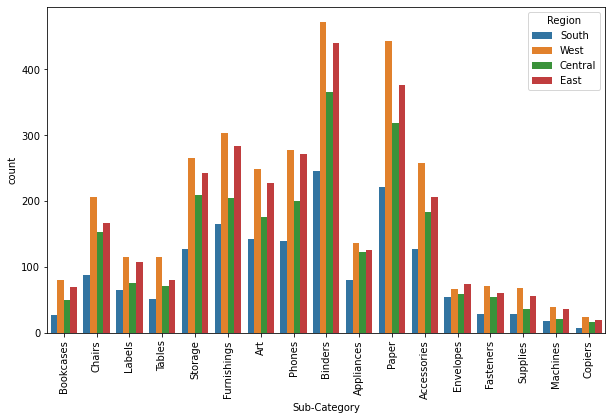

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(x="Sub-Category", hue="Region",data=df)
plt.xticks(rotation="vertical")
plt.show()


In [ ]:
Conclusions :-
 The profit and sales are highly corelated to each other.
 No correlation between quantity and profit.
 Cost should be reduced in some areas to increase the profit.
 Increase the shipping mode.
 Many states needs improvement in terms of category and sub-category,they should be sell at reasonable price.